*Sakshi* Patil
<br> B 2018130039

##Experiment 6

**Objective**: To perform time series analysis: identifying the nature of the phenomenon represented by the sequence of observations, and forecasting 

**Introduction:**

A time series is a chronological sequence of observations on a particular variable. Usually the observations are taken at regular intervals (days, months, years), but the sampling could be irregular. A time series analysis consists of steps:

(1) building a model that represents a time series

(2) validating the model proposed

(3) using the model to predict (forecast) future values and/or impute missing values.

If a time series has a regular pattern, then a value of the series should be a function of previous values. The goal of building a time series model is the same as the goal for other types of predictive models which is to create a model such that the error between the predicted value of the target variable and the actual value is as small as possible.

The primary difference between time series models and other types of models is that lag values of the target variable are used as predictor variables, whereas traditional models use other variables as predictors, and the concept of a lag value doesn’t apply because the observations don’t represent a chronological sequence.

From experimental point of view There are two general approaches to modelling time series data that contain a trend and/or seasonal variation.

1. First model the trend and seasonality in the data, and then use a stationary time series model to represent the short-term correlation.

2. Model the trend, seasonality and short-term correlation in the data simultaneously using a non-stationary time series model.


##stationary series
A stationary (time) series is one whose statistical properties such as the mean, variance and autocorrelation are all constant over time. Hence, a non-stationary series is one whose statistical properties change over time.

Non-stationary data should be first converted into stationary data (for example by trend removal), so that further statistical analysis can be done on the de-trended stationary data. This is so because for example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. The usual mean of “de-trending” a series is to fit a regression line and then subtract it from the original data.

Task:

1. Create time series data.

  · Replication requirements: What you’ll need to reproduce the analysis

  · Creating time series objects: Convert your data to a time series object for time series analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

# importing the necessary libraries

import seaborn as sns
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline  
import statsmodels
import statsmodels.api as sm             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [ ]:
df = df.set_index(df["Date"])
df.head()

,Date,Temp
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8


In [ ]:
df.drop(["Date"], inplace=True, axis=1)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
d = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday.map(d)

In [ ]:
df.head()

,Temp,year,month,day,weekday
Date,,,,,
1981-01-01,20.7,1981,1,1,Wednesday
1981-01-02,17.9,1981,1,2,Thursday
1981-01-03,18.8,1981,1,3,Friday
1981-01-04,14.6,1981,1,4,Saturday
1981-01-05,15.8,1981,1,5,Sunday


In [ ]:
df.tail()

,Temp,year,month,day,weekday
Date,,,,,
1990-12-27,14.0,1990,12,27,Wednesday
1990-12-28,13.6,1990,12,28,Thursday
1990-12-29,13.5,1990,12,29,Friday
1990-12-30,15.7,1990,12,30,Saturday
1990-12-31,13.0,1990,12,31,Sunday


In [ ]:
df_temp = df[df.year < 1983]
df_temp.head()

,Temp,year,month,day,weekday
Date,,,,,
1981-01-01,20.7,1981,1,1,Wednesday
1981-01-02,17.9,1981,1,2,Thursday
1981-01-03,18.8,1981,1,3,Friday
1981-01-04,14.6,1981,1,4,Saturday
1981-01-05,15.8,1981,1,5,Sunday


In [ ]:
df_temp = df_temp[["Temp"]]

In [ ]:
df_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
df_temp.describe()

,Temp
count,730.000000
mean,11.150411
std,4.589728
min,0.000000
25%,7.800000
50%,11.000000
75%,14.200000
max,26.300000


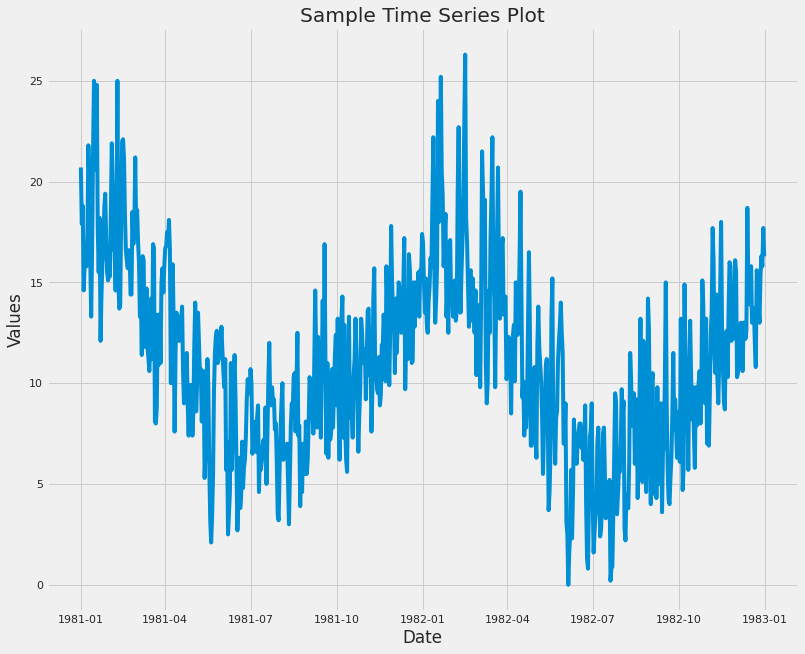

In [ ]:
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Sample Time Series Plot")
 

plt.plot(df_temp.Temp)

**Analysis** :

Here we can observe that the dataset has a particular trend and seasonality for a fixed time period. 

We can see a particular pattern repeating every year.

Now let's check if our data is stationarity

### **Decomposition of a Time Series**


Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

The seasonal_decompose in statsmodels implements this conveniently.

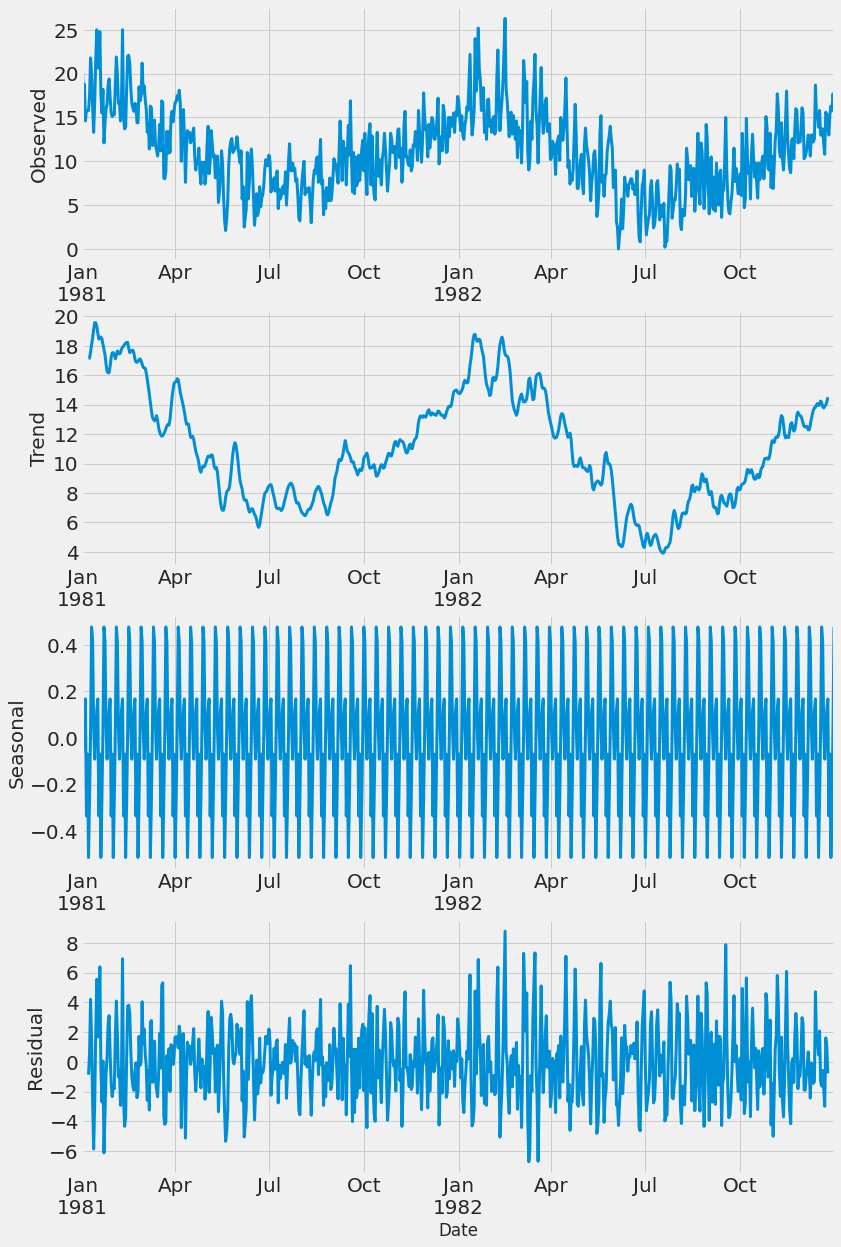

In [ ]:
def plot_decompose(decompose_result):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))
    decompose_result.observed.plot(legend=False,ax=ax1,fontsize = 20,grid=True,linewidth = 3)
    ax1.set_ylabel("Observed",fontsize = 20)
    decompose_result.trend.plot(legend=False,ax=ax2,fontsize = 20,grid=True,linewidth = 3)
    ax2.set_ylabel("Trend",fontsize = 20)
    decompose_result.seasonal.plot(legend=False,ax=ax3,fontsize = 20,grid=True,linewidth = 3)
    ax3.set_ylabel("Seasonal",fontsize = 20)
    decompose_result.resid.plot(legend=False,ax=ax4,fontsize = 20,grid=True,linewidth = 3)
    ax4.set_ylabel("Residual",fontsize = 20)

mult_decomposition = seasonal_decompose(df_temp['Temp'], freq=12) 
plot_decompose(mult_decomposition)

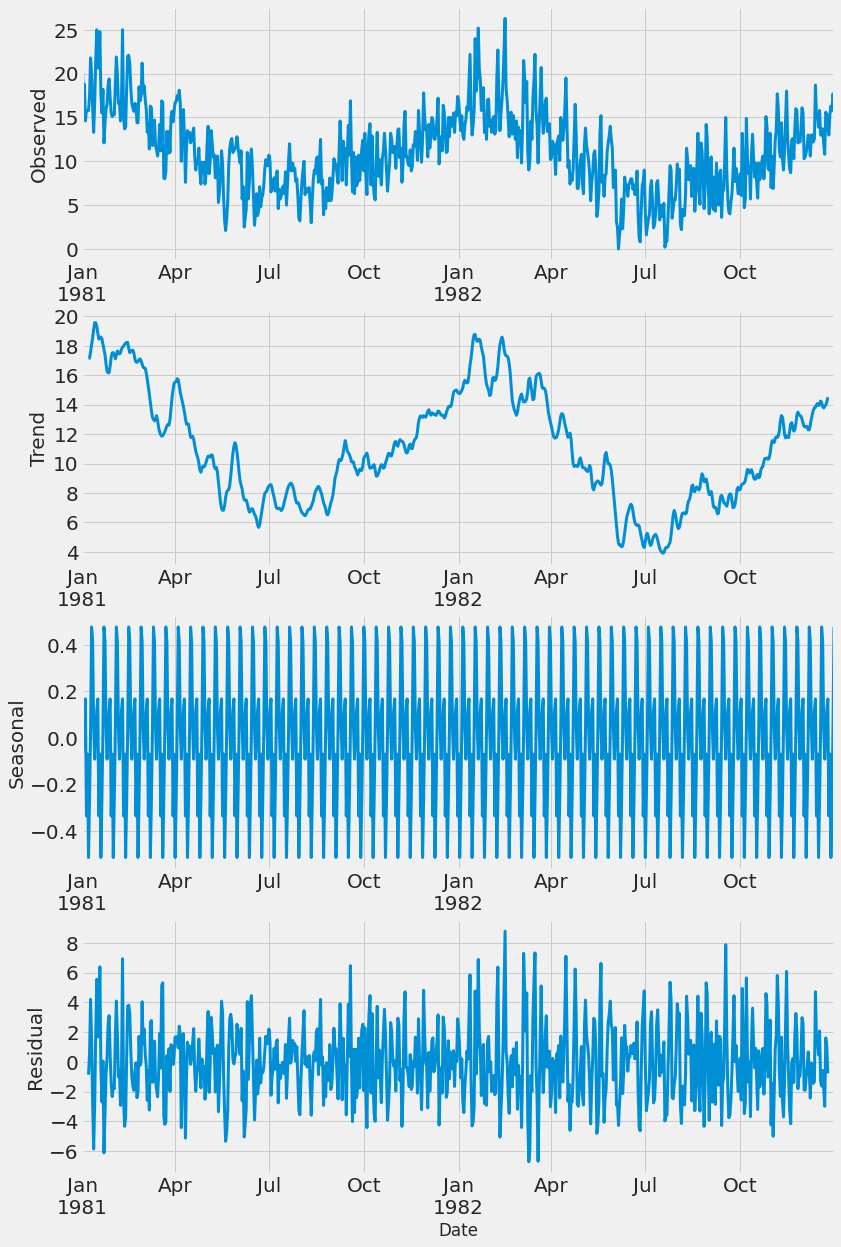

In [ ]:
add_decomposition = seasonal_decompose(df_temp['Temp'], freq=12, model='additive') 
plot_decompose(add_decomposition)

**Analysis:** 
1. As we can see there is a seasonal periodicity. 
2. Also, the additive model has some periodicity left while the multiplicative decomposition looks random, hence we should consider that

### **Stationarity Property**

Stationarity is a property of a time series where the values of the series is not a function of time. So, the values are independent of time.

Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. 

Autocorrelation of the series is nothing but the correlation of the series with its previous values.

A stationary time series is independent of seasonal effects as well.

### **How to check Stationarity ?**
The stationarity of a series can be checked by 

1. Looking at the plot of the series.

2. Augmented Dickey Fuller test (ADF Test)

3. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

4. Philips Perron test (PP Test)

#### 1. Looking at the rolling statics plots

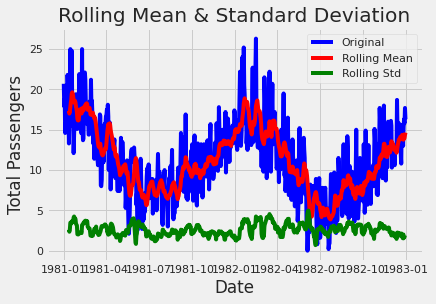

In [ ]:
def rolling_stats(series):
    #Determine rolling statistics
    rolmean = series.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level

    rolstd = series.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(series, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.ylabel('Total Passengers')
    plt.xlabel('Date')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

rolling_stats(df_temp["Temp"])

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. 

Since it has a trend, we may conclude that it is non-stationary time series data.

But let's confirm it with the ADF Test



#### 2. Augmented Dickey Fuller test (ADF Test)

Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.

In [ ]:
# Stability Test (Dickey-Fuller Test)
def adfTest(y):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(y)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

adfTest(df_temp["Temp"])

Results of Dickey-Fuller Test:
Test Statistic                  -2.106925
p-value                          0.241739
#Lags Used                      18.000000
Number of Observations Used    711.000000
Critical Value (1%)             -3.439581
Critical Value (5%)             -2.865614
Critical Value (10%)            -2.568939
dtype: float64


Now here since the p value is more than 0.05 and there is a significant difference between the test statistic value and critical values. 

We can accept the null hypothesis and conclude that the time series is a non-stationary one.

In [ ]:
def is_stationary(series):
    rolling_stats(series)
    adfTest(series)

#### Autocorrelation and Partial Autocorrelation Functions

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

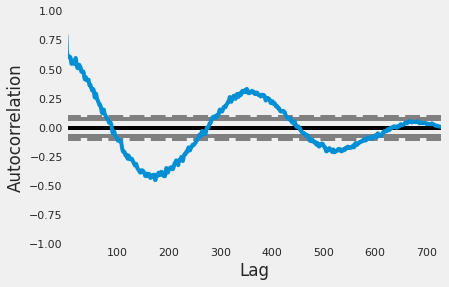

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_temp["Temp"].tolist())

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_temp["Temp"], nlags=10)
lag_pacf = pacf(df_temp["Temp"], nlags=10, method='ols')

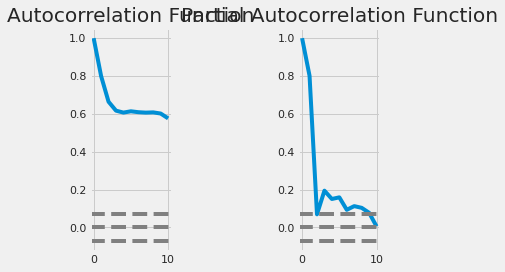

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(df_temp["Temp"])), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_temp["Temp"])), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df_temp["Temp"])), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_temp["Temp"])), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

###**White noise: Differentiating signal from the noise.**

Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

But since our time series doesn't have a mean of 0 and does have a pattern/seasonality to it, we can differentiate it from white noise.

### **Converting the non-stationary series into a stationary series**

Mostly statistical forecasting methods are designed to work on a stationary time series. 

Thus, the first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

So for our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. 

We can apply some sort of transformation to make the time-series stationary. These transformation may include:

- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above

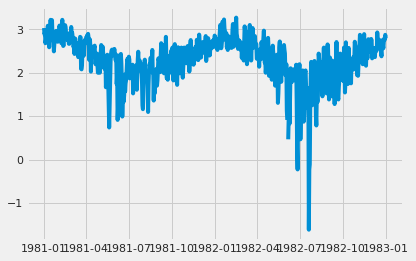

In [ ]:
ts_log = np.log(df_temp["Temp"])
plt.plot(ts_log)

1. DeTrend by differencing with the moving average

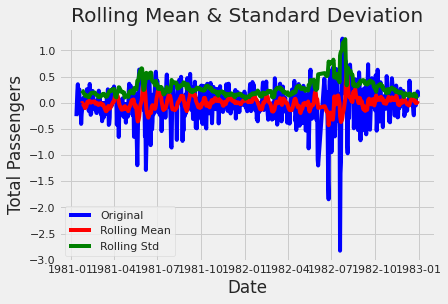

Results of Dickey-Fuller Test:
Test Statistic                -7.394397e+00
p-value                        7.847242e-11
#Lags Used                     2.000000e+01
Number of Observations Used    6.860000e+02
Critical Value (1%)           -3.439918e+00
Critical Value (5%)           -2.865762e+00
Critical Value (10%)          -2.569019e+00
dtype: float64


In [ ]:
detrended = ts_log - ts_log.rolling(12).mean()
detrended.dropna(inplace=True)
is_stationary(detrended)

2. DeTrend by differencing with the weighted moving average 

(eg. exponential weighted moving averaged, majorly used in complex situations where weights are assigned to all the previous values with a decay factor)

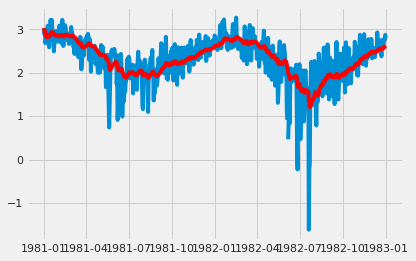

In [ ]:
exp_weighted_avg = ts_log.ewm(halflife = 12).mean()
plt.plot(ts_log)
plt.plot(exp_weighted_avg, color = 'red')

2. Deseasonalize

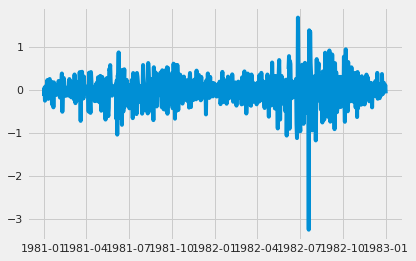

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
df_temp.shape

(730, 1)

In [ ]:
train = df_temp[:600]
test = df_temp[600:]

In [ ]:
def plot_prediction(y_pred, label):
    train["Temp"].plot(legend=True, label="TRAIN")
    test["Temp"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train and Test Using "+label)
    plt.show()

alpha: 0.01 mae: 3.3943
alpha: 0.11 mae: 4.0146
alpha: 0.21 mae: 3.9023
alpha: 0.31 mae: 4.0078
alpha: 0.41 mae: 4.1901
alpha: 0.51 mae: 4.4243
alpha: 0.61 mae: 4.7062
alpha: 0.71 mae: 5.0123
alpha: 0.81 mae: 5.3133
alpha: 0.91 mae: 5.5692
best_alpha: 0.01 best_mae: 3.3943


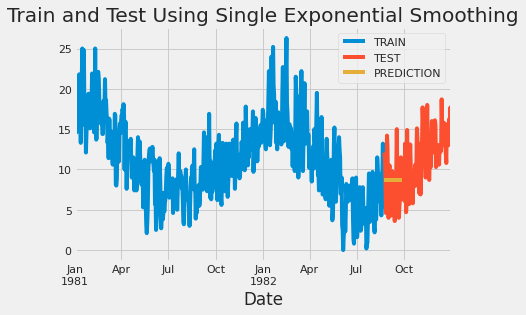

In [ ]:
# Single Exponential Smoothing 

def ses_optimizer(train, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=130)

ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(36)

plot_prediction(y_pred, "Single Exponential Smoothing")

alpha: 0.01 beta: 0.01 mae: 5.3206
alpha: 0.01 beta: 0.11 mae: 2.8691
alpha: 0.01 beta: 0.21 mae: 2.703
alpha: 0.01 beta: 0.31 mae: 10.7856
alpha: 0.01 beta: 0.41 mae: 11.6864
alpha: 0.01 beta: 0.51 mae: 11.9879
alpha: 0.01 beta: 0.61 mae: 15.9656
alpha: 0.01 beta: 0.71 mae: 16.7442
alpha: 0.01 beta: 0.81 mae: 25.547
alpha: 0.01 beta: 0.91 mae: 10.6543
alpha: 0.11 beta: 0.01 mae: 4.8273
alpha: 0.11 beta: 0.11 mae: 5.8808
alpha: 0.11 beta: 0.21 mae: 2.4418
alpha: 0.11 beta: 0.31 mae: 3.3353
alpha: 0.11 beta: 0.41 mae: 4.0838
alpha: 0.11 beta: 0.51 mae: 6.4946
alpha: 0.11 beta: 0.61 mae: 6.3552
alpha: 0.11 beta: 0.71 mae: 11.8693
alpha: 0.11 beta: 0.81 mae: 31.643
alpha: 0.11 beta: 0.91 mae: 54.042
alpha: 0.21 beta: 0.01 mae: 4.4506
alpha: 0.21 beta: 0.11 mae: 2.3936
alpha: 0.21 beta: 0.21 mae: 5.4031
alpha: 0.21 beta: 0.31 mae: 11.4801
alpha: 0.21 beta: 0.41 mae: 20.7875
alpha: 0.21 beta: 0.51 mae: 30.4046
alpha: 0.21 beta: 0.61 mae: 32.8609
alpha: 0.21 beta: 0.71 mae: 24.9824
alpha: 0.

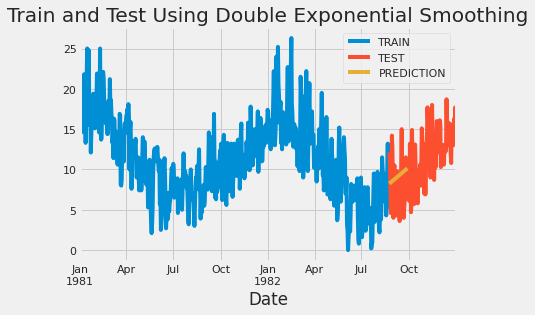

In [ ]:
# Double Exponential Smoothing

def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae


alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=130)
#54.10

des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)
y_pred = des_model.forecast(36)

plot_prediction(y_pred, "Double Exponential Smoothing")

[0.1, 0.1, 0.1, 5.08]
[0.1, 0.1, 0.3, 4.36]
[0.1, 0.1, 0.5, 3.83]
[0.1, 0.1, 0.7, 3.52]
[0.1, 0.1, 0.9, 3.61]
[0.1, 0.3, 0.1, 5.19]
[0.1, 0.3, 0.3, 4.45]
[0.1, 0.3, 0.5, 4.08]
[0.1, 0.3, 0.7, 3.36]
[0.1, 0.3, 0.9, 3.31]
[0.1, 0.5, 0.1, 10.31]
[0.1, 0.5, 0.3, 9.27]
[0.1, 0.5, 0.5, 9.62]
[0.1, 0.5, 0.7, 17.5]
[0.1, 0.5, 0.9, 45.42]
[0.1, 0.7, 0.1, 14.23]
[0.1, 0.7, 0.3, 31.31]
[0.1, 0.7, 0.5, 57.45]
[0.1, 0.7, 0.7, 58.8]
[0.1, 0.7, 0.9, 3449.42]
[0.1, 0.9, 0.1, 62.71]
[0.1, 0.9, 0.3, 91.76]
[0.1, 0.9, 0.5, 67.52]
[0.1, 0.9, 0.7, 29116.57]
[0.1, 0.9, 0.9, 496254464.72]
[0.3, 0.1, 0.1, 5.89]
[0.3, 0.1, 0.3, 7.97]
[0.3, 0.1, 0.5, 10.55]
[0.3, 0.1, 0.7, 17.71]
[0.3, 0.1, 0.9, 31.12]
[0.3, 0.3, 0.1, 31.31]
[0.3, 0.3, 0.3, 32.57]
[0.3, 0.3, 0.5, 44.99]
[0.3, 0.3, 0.7, 48.79]
[0.3, 0.3, 0.9, 4692.43]
[0.3, 0.5, 0.1, 43.63]
[0.3, 0.5, 0.3, 4.22]
[0.3, 0.5, 0.5, 11285.03]
[0.3, 0.5, 0.7, 2998494.2]
[0.3, 0.5, 0.9, 1442337502.02]
[0.3, 0.7, 0.1, 6.03]
[0.3, 0.7, 0.3, 1487.44]
[0.3, 0.7, 0.5, 14320

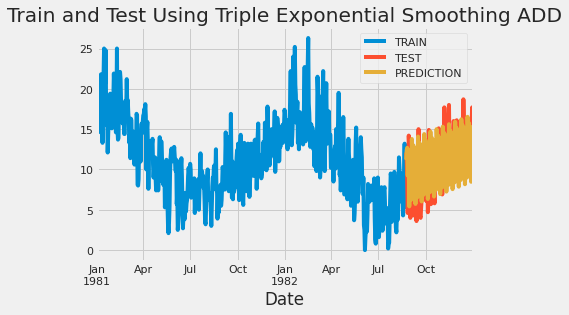

In [ ]:
# Triple Exponential Smoothing (Holt-Winters)
import itertools

def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=130)

tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

y_pred = tes_model.forecast(130)

plot_prediction(y_pred, "Triple Exponential Smoothing ADD")


ARIMA(0, 0, 0) AIC=3582.55
ARIMA(0, 0, 1) AIC=3191.65
ARIMA(0, 0, 2) AIC=3063.62
ARIMA(0, 0, 3) AIC=2997.89
ARIMA(0, 1, 0) AIC=2943.14
ARIMA(0, 1, 1) AIC=2915.77
ARIMA(0, 1, 2) AIC=2831.68
ARIMA(0, 1, 3) AIC=2819.43
ARIMA(0, 2, 0) AIC=3438.53
ARIMA(0, 2, 1) AIC=2947.62
ARIMA(1, 0, 0) AIC=2898.35
ARIMA(1, 0, 1) AIC=2894.70
ARIMA(1, 0, 2) AIC=2838.75
ARIMA(1, 0, 3) AIC=2827.42
ARIMA(1, 1, 0) AIC=2930.87
ARIMA(1, 1, 1) AIC=2823.76
ARIMA(1, 1, 2) AIC=2818.69
ARIMA(1, 1, 3) AIC=2820.03
ARIMA(1, 2, 0) AIC=3278.95
ARIMA(2, 0, 0) AIC=2897.10
ARIMA(2, 0, 1) AIC=2832.11
ARIMA(2, 0, 2) AIC=2826.89
ARIMA(2, 0, 3) AIC=2828.20
ARIMA(2, 1, 0) AIC=2904.30
ARIMA(2, 1, 1) AIC=2817.69
ARIMA(2, 1, 2) AIC=2819.12
ARIMA(2, 1, 3) AIC=2822.49
ARIMA(2, 2, 0) AIC=3191.76
ARIMA(3, 0, 0) AIC=2883.96
ARIMA(3, 0, 1) AIC=2825.81
ARIMA(3, 0, 2) AIC=2827.14
ARIMA(3, 0, 3) AIC=2830.71
ARIMA(3, 1, 0) AIC=2884.84
ARIMA(3, 1, 1) AIC=2819.15
ARIMA(3, 1, 2) AIC=2821.49
ARIMA(3, 1, 3) AIC=2822.53
ARIMA(3, 2, 0) AIC=3142.73
B

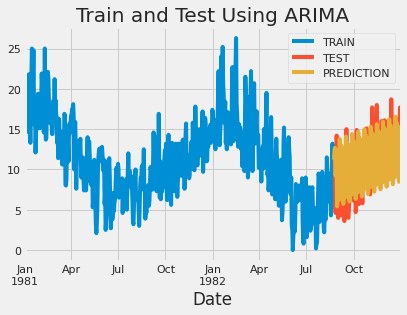

In [ ]:
import itertools

p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arma_model_result = ARIMA(train, order).fit(disp=0)
            aic = arma_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params

best_params_aic = arima_optimizer_aic(train, pdq)

# Tuned Model
arima_model = ARIMA(train, best_params_aic).fit(disp=0)
mean_absolute_error(test, y_pred)

plot_prediction(pd.Series(y_pred, index=test.index), "ARIMA")


### **Conclusion -**

Through this experiment, I have performed time series analysis and forecasting on temperature dataset. I implemented several graphs for analysing the data whether it is stationary or not and then tried to bring it to a stationary one. After that I used the state of the art models like smoothening, ARIMA, SARIMA models to forecast this time series data.